In [1]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.utils import np_utils
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras import backend as K
K.set_image_dim_ordering('th')

Using TensorFlow backend.


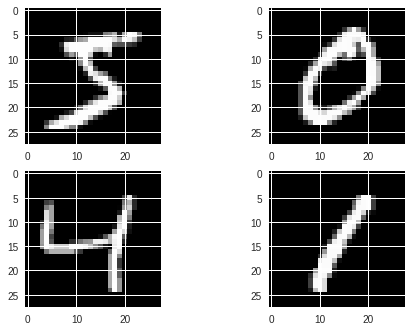

In [2]:
# load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [0]:
def nn_model1():
  model = Sequential()
  model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
  model.add(Dense(10, kernel_initializer='normal', activation='softmax'))

  # Compile model 
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  print("Directly connected network model loaded")
  return model

def nn_model2():  
  model = Sequential()
  model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
  model.add(Dense(800, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
  model.add(Dropout(0.3))
  model.add(Dense(400, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(200, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(100, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(10, kernel_initializer='normal', activation='softmax'))
  # Compile model 
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  print("Feed forward network model loaded")
  return model

def cnn_model():
  model = Sequential()
  model.add(Conv2D(32, (4, 4), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Flatten())
  model.add(Dense(200, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(100, activation='relu'))
  model.add(Dropout(0.3))
  model.add(Dense(num_classes, activation='softmax'))
  # Compile model
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  print("CNN model loaded")
  return model


In [0]:
def data_for_feedForward_nn():
  print("Modifying data for Feed Forward Neural network")
  global X_train, y_train, X_test, y_test, num_pixels, num_classes
  (X_train, y_train), (X_test, y_test) = mnist.load_data()

  # flatten 28*28 images to a 784 vector for each image
  num_pixels = X_train.shape[1] * X_train.shape[2]
  X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
  X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')
  
  # normalize inputs from 0-255 to 0-1
  X_train = X_train / 255
  X_test = X_test / 255
  
  y_train = np_utils.to_categorical(y_train)
  y_test = np_utils.to_categorical(y_test)
  num_classes = y_test.shape[1]
  print("Data loaded")

def data_for_cnn():
  print("Loading data for CNN")
  global X_train, y_train, X_test, y_test, num_classes
  (X_train, y_train), (X_test, y_test) = mnist.load_data()
  
  # reshape to be [samples][pixels][width][height]
  X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
  X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')
  
  X_train = X_train / 255
  X_test = X_test / 255
  # one hot encode outputs
  y_train = np_utils.to_categorical(y_train)
  y_test = np_utils.to_categorical(y_test)
  num_classes = y_test.shape[1]
  print("Data loaded")

def plot_acc_loss(history1, history2, history3):
  # Accuracy  
  plt.plot(history1.history['acc'], label="Train Directly Connected model")
  plt.plot(history1.history['val_acc'], label="Validation Directly Connected model")
  plt.plot(history2.history['acc'], label="Train Feed Forward network model")
  plt.plot(history2.history['val_acc'], label="Validation Feed Forward network model")
  plt.plot(history3.history['acc'],label="Train CNN")
  plt.plot(history3.history['val_acc'], label="Validation CNN")
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('epoch')
  plt.legend(loc='lower right')
  plt.show()
  # "Loss"
  plt.plot(history1.history['loss'], label="Train Directly conected model")
  plt.plot(history1.history['val_loss'], label="Validation directly connected model")
  plt.plot(history2.history['loss'], label='Train Feed forward network')
  plt.plot(history2.history['val_loss'], label="Validation Feed Forward network")
  plt.plot(history3.history['loss'], label='Train CNN model')
  plt.plot(history3.history['val_loss'], label="Validation CNN Model")
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('epoch')
  plt.legend(loc='upper right')
  plt.show()

  

In [5]:
data_for_feedForward_nn()
model1 = nn_model1()
print("Trainig directly connevted network")
history1 = model1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=200, verbose=1)

Modifying data for Feed Forward Neural network
Data loaded
Directly connected network model loaded
Trainig directly connevted network
Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 3s 45us/step - loss: 0.2779 - acc: 0.9227 - val_loss: 0.1408 - val_acc: 0.9581
Epoch 2/30
60000/60000 [==============================] - 2s 31us/step - loss: 0.1110 - acc: 0.9676 - val_loss: 0.1044 - val_acc: 0.9693
Epoch 3/30
60000/60000 [==============================] - 2s 30us/step - loss: 0.0724 - acc: 0.9792 - val_loss: 0.0830 - val_acc: 0.9742
Epoch 4/30
60000/60000 [==============================] - 2s 30us/step - loss: 0.0498 - acc: 0.9860 - val_loss: 0.0688 - val_acc: 0.9776
Epoch 5/30
60000/60000 [==============================] - 2s 31us/step - loss: 0.0355 - acc: 0.9905 - val_loss: 0.0635 - val_acc: 0.9811
Epoch 6/30
60000/60000 [==============================] - 2s 31us/step - loss: 0.0263 - acc: 0.9926 - val_loss: 0.0581 - val_acc: 0

In [6]:
model2 = nn_model2()
print("Training Deep Neural network")
history2 = model2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=200, verbose=1)

Feed forward network model loaded
Training Deep Neural network
Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 4s 70us/step - loss: 0.3962 - acc: 0.8769 - val_loss: 0.1200 - val_acc: 0.9660
Epoch 2/30
60000/60000 [==============================] - 4s 61us/step - loss: 0.1262 - acc: 0.9653 - val_loss: 0.0976 - val_acc: 0.9726
Epoch 3/30
60000/60000 [==============================] - 4s 61us/step - loss: 0.0879 - acc: 0.9766 - val_loss: 0.0841 - val_acc: 0.9772
Epoch 4/30
60000/60000 [==============================] - 4s 60us/step - loss: 0.0670 - acc: 0.9821 - val_loss: 0.0807 - val_acc: 0.9792
Epoch 5/30
60000/60000 [==============================] - 4s 61us/step - loss: 0.0560 - acc: 0.9844 - val_loss: 0.0843 - val_acc: 0.9788
Epoch 6/30
60000/60000 [==============================] - 4s 61us/step - loss: 0.0414 - acc: 0.9882 - val_loss: 0.0856 - val_acc: 0.9806
Epoch 7/30
60000/60000 [==============================] - 4s 61us

In [7]:
data_for_cnn()
model3 = cnn_model()
print("Training CNN")
history3 = model3.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=200, verbose=1)

Loading data for CNN
Data loaded
CNN model loaded
Training CNN
Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 6s 95us/step - loss: 0.3890 - acc: 0.8772 - val_loss: 0.0766 - val_acc: 0.9742
Epoch 2/30
60000/60000 [==============================] - 4s 73us/step - loss: 0.1045 - acc: 0.9700 - val_loss: 0.0411 - val_acc: 0.9869
Epoch 3/30
60000/60000 [==============================] - 5s 75us/step - loss: 0.0751 - acc: 0.9779 - val_loss: 0.0293 - val_acc: 0.9905
Epoch 4/30
60000/60000 [==============================] - 4s 72us/step - loss: 0.0595 - acc: 0.9831 - val_loss: 0.0274 - val_acc: 0.9909
Epoch 5/30
60000/60000 [==============================] - 4s 72us/step - loss: 0.0479 - acc: 0.9863 - val_loss: 0.0262 - val_acc: 0.9916
Epoch 6/30
60000/60000 [==============================] - 4s 72us/step - loss: 0.0409 - acc: 0.9881 - val_loss: 0.0255 - val_acc: 0.9924
Epoch 7/30
60000/60000 [==============================] - 4s 72us

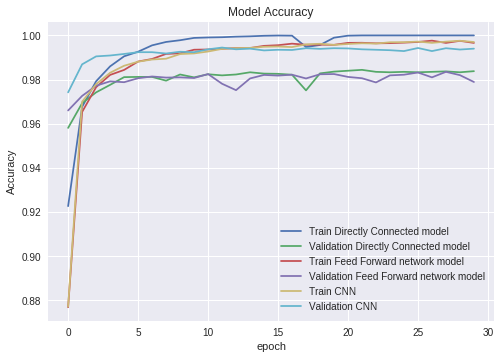

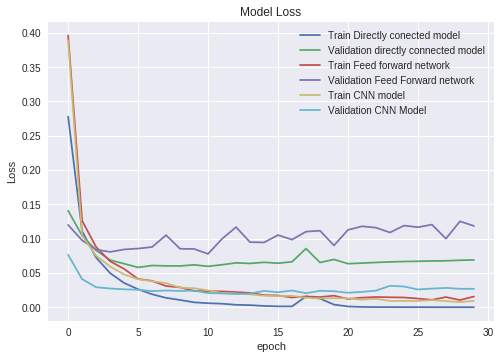

In [8]:
plot_acc_loss(history1, history2, history3)